___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Introduction to Pandas

In this section of the course we will learn how to use pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features. In this section of the course, you should go through the notebooks in this order:

* Introduction to Pandas
* Series
* DataFrames
* Missing Data
* GroupBy
* Merging,Joining,and Concatenating
* Operations
* Data Input and Output

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

In [36]:
import numpy as np
import pandas as pd

In [37]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

In [38]:
S=pd.Series(my_list,index=labels)
type(S)

pandas.core.series.Series

In [39]:
S

a    10
b    20
c    30
dtype: int64

In [40]:
S['a']

10

In [41]:
S.index

Index(['a', 'b', 'c'], dtype='object')

In [42]:
S.name='col-1'
S

a    10
b    20
c    30
Name: col-1, dtype: int64

In [43]:
S1=pd.Series({'col-1':[10,20,30]}) # we can also define series with help od dictionary
type(S1)

pandas.core.series.Series

In [44]:
S1

col-1    [10, 20, 30]
dtype: object

In [45]:
S.values

array([10, 20, 30], dtype=int64)

In [46]:
S.mean()

20.0

In [47]:
S.min()

10

In [48]:
#Series Iterations
for idx,val in S.iteritems():
  print(idx,val)
  print('done')

a 10
done
b 20
done
c 30
done


In [49]:
#Creating a DataFrame 
dat=pd.DataFrame({'Item':['Bread','milk','egg'],'Price':[25, 28, 5.5]})
dat


,Item,Price
0,Bread,25.0
1,milk,28.0
2,egg,5.5


In [50]:
dat.index

RangeIndex(start=0, stop=3, step=1)

In [51]:
dat.columns

Index(['Item', 'Price'], dtype='object')

In [52]:
dat.index=['a','b','c']
dat

,Item,Price
a,Bread,25.0
b,milk,28.0
c,egg,5.5


In [53]:
#Fetching DataFrame
#To fetch a record (row)
dat.loc['a']

Item     Bread
Price       25
Name: a, dtype: object

In [54]:
dat.iloc[0,:]

Item     Bread
Price       25
Name: a, dtype: object

In [55]:
#To fetch a column
dat['Item']

a    Bread
b     milk
c      egg
Name: Item, dtype: object

In [56]:
dat['Price'].mean()

19.5

In [57]:
dat.Price #SQL style of fetch

a    25.0
b    28.0
c     5.5
Name: Price, dtype: float64

In [58]:
dat.iloc[:,1] #another way

a    25.0
b    28.0
c     5.5
Name: Price, dtype: float64

In [59]:
dat['useby']=[5,1,7] #defined another col by default adds at the last
dat

,Item,Price,useby
a,Bread,25.0,5
b,milk,28.0,1
c,egg,5.5,7


In [60]:
dat.drop('useby',axis=1) #to remove any particular column
dat
#but it doesnt get drop because it is not updated in the dataframe 

,Item,Price,useby
a,Bread,25.0,5
b,milk,28.0,1
c,egg,5.5,7


In [61]:
#Either overwrite on the object 
#            like----> dat=dat.drop('useby',axis=1)
#or use inplace=True
dat.drop('useby',axis=1,inplace=True)
dat

,Item,Price
a,Bread,25.0
b,milk,28.0
c,egg,5.5


In [62]:
#We can also drop a row
dat.drop('c',axis=0,inplace=True)
dat

,Item,Price
a,Bread,25.0
b,milk,28.0


In [64]:
dat.columns=['c1','c2']
dat.index=['purchase1','purchase2']
dat

,c1,c2
purchase1,Bread,25.0
purchase2,milk,28.0


In [67]:
from numpy.random import randn
np.random.seed(1) #seed keeps the same random number on running more than once
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df

,W,X,Y,Z
A,1.624345,-0.611756,-0.528172,-1.072969
B,0.865408,-2.301539,1.744812,-0.761207
C,0.319039,-0.249370,1.462108,-2.060141
D,-0.322417,-0.384054,1.133769,-1.099891
E,-0.172428,-0.877858,0.042214,0.582815


In [68]:
#if you dont want to import like this
np.random.seed(1) #seed keeps the same random number on running more than once .....check notes
df = pd.DataFrame(np.random.randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df

,W,X,Y,Z
A,1.624345,-0.611756,-0.528172,-1.072969
B,0.865408,-2.301539,1.744812,-0.761207
C,0.319039,-0.249370,1.462108,-2.060141
D,-0.322417,-0.384054,1.133769,-1.099891
E,-0.172428,-0.877858,0.042214,0.582815


In [69]:
df>0

,W,X,Y,Z
A,True,False,False,False
B,True,False,True,False
C,True,False,True,False
D,False,False,True,False
E,False,False,True,True


In [70]:
df['W']>0

A     True
B     True
C     True
D    False
E    False
Name: W, dtype: bool

In [71]:
df[df['W']>0] #logical indexing using df---[df['W']>0] as index .first 3 records of w are true so it will get only first 3 records of all as it is used as index and for false wont show

,W,X,Y,Z
A,1.624345,-0.611756,-0.528172,-1.072969
B,0.865408,-2.301539,1.744812,-0.761207
C,0.319039,-0.249370,1.462108,-2.060141


In [72]:
df[df['W']>0]['X'] #to show only X col's values

A   -0.611756
B   -2.301539
C   -0.249370
Name: X, dtype: float64

In [73]:
df['states']=['UP','RJ','TN','AP','WB']
df

,W,X,Y,Z,states
A,1.624345,-0.611756,-0.528172,-1.072969,UP
B,0.865408,-2.301539,1.744812,-0.761207,RJ
C,0.319039,-0.249370,1.462108,-2.060141,TN
D,-0.322417,-0.384054,1.133769,-1.099891,AP
E,-0.172428,-0.877858,0.042214,0.582815,WB


In [74]:
df.set_index('states',inplace=True)


In [75]:
df

,W,X,Y,Z
states,,,,
UP,1.624345,-0.611756,-0.528172,-1.072969
RJ,0.865408,-2.301539,1.744812,-0.761207
TN,0.319039,-0.249370,1.462108,-2.060141
AP,-0.322417,-0.384054,1.133769,-1.099891
WB,-0.172428,-0.877858,0.042214,0.582815


In [78]:
D = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
D

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [79]:
D.dropna() # by default checksrow wise

,A,B,C
0,1.0,5.0,1


In [80]:
D.dropna(axis=1) #now checks col wise

,C
0,1
1,2
2,3


In [81]:
D.dropna(thresh=2) #row having 2 or more nan gets dropped

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [82]:
D['A'].fillna(value=D['A'].mean(),inplace=True) #replace by mean
D

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,1.5,NaN,3


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [77]:
#Let us read an external data for colab
dat=pd.read_table('/content/drive/My Drive/Python for ML-Mahesh Anand/HR.txt',index_col=0)
dat.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,2,2,94,3,2,1,4,1,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,3,1,61,2,2,2,2,2,5130,24907,1,2,23,4,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,4,1,92,2,1,3,3,1,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,4,2,56,3,1,2,3,2,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,1,1,40,3,1,3,2,2,3468,16632,9,2,12,3,4,80,1,6,3,3,2,2,2,2


In [90]:
dat=pd.read_table('HR.txt',index_col=0)
dat.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [91]:
dat.shape

(1470, 34)

In [85]:
dat.columns

Index(['Individual ', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

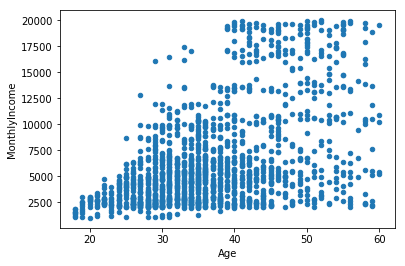

In [93]:
dat.plot.scatter(x='Age',y='MonthlyIncome')

In [96]:
f=dat['Gender'].value_counts()
f

1    882
2    588
Name: Gender, dtype: int64

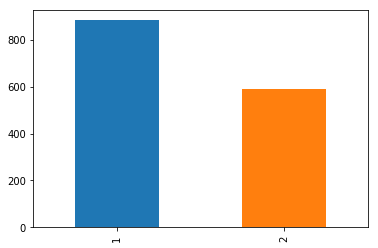

In [97]:
f.plot(kind='bar')

In [87]:
dat_G=dat.groupby('Gender')
type(dat_G)

pandas.core.groupby.groupby.DataFrameGroupBy

In [88]:
g1=dat_G.get_group(1)
g1.shape

(882, 35)

In [89]:
#We shall convert a df to csv file
g1.to_csv('/content/drive/My Drive/Python for ML-Mahesh Anand/Male_DF.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Python for ML-Mahesh Anand/Male_DF.csv'

In [86]:
#Now load the csv and check the data
male_df=pd.read_csv('/content/drive/My Drive/Python for ML-Mahesh Anand/Male_DF.csv')
male_df.head()

,Individual,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Ind2,No,49,2,279,2,8,1,1,1,2,3,1,61,2,2,2,2,2,5130,24907,1,2,23,4,4,80,1,10,3,3,10,7,1,7
1,Ind3,Yes,37,1,1373,2,2,2,6,1,4,4,1,92,2,1,3,3,1,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
2,Ind5,No,27,1,591,2,2,1,2,1,7,1,1,40,3,1,3,2,2,3468,16632,9,2,12,3,4,80,1,6,3,3,2,2,2,2
3,Ind6,No,32,2,1005,2,2,2,1,1,8,4,1,79,3,1,3,4,1,3068,11864,0,2,13,3,3,80,0,8,2,2,7,7,3,6
4,Ind8,No,30,1,1358,2,24,1,1,1,11,4,1,67,3,1,3,3,3,2693,13335,1,2,22,4,2,80,1,1,2,3,1,0,0,0


In [83]:
g2=dat_G.get_group(2)
g2.shape

(588, 34)

In [0]:
#Merging and Concatenation of Data Frames


In [0]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [0]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [0]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [91]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [92]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [93]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use pd.concat and pass in a list of DataFrames to concatenate together:

In [94]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [0]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

In [0]:
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [97]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [98]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


The merge function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [99]:
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [0]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

In [0]:
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [102]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [103]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [104]:
pd.merge(left, right, on=['key1', 'key2']) #default is Inner

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [105]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [106]:
pd.merge(left, right, how='right', on=['key1', 'key2']) #based on right side key

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [107]:
pd.merge(left, right, how='left', on=['key1', 'key2']) #based on left side key

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [0]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

In [0]:
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [110]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [111]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [112]:
left.join(right) #with reference to common index

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [113]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


___